# Investigación 3 - Tópicos en Reconocimiento de Patrones
## Andrés Vargas Guevara

# Reinforcement Learning

### Introducción

<div>
<img src="1*iWjbIValN-tXJ7sMQK1VSQ.png" width="800"/>
</div>

### Fundamentos

<div>
<img src="1*sp94L_gZdmdkS7Hz2JkBAg.png" width="800"/>
</div>

### Términos importantes

<div>
<img src="Reinforcement_learning_diagram.svg.png" width="600"/>
</div>

## Ejemplo - Space Invaders

<div>
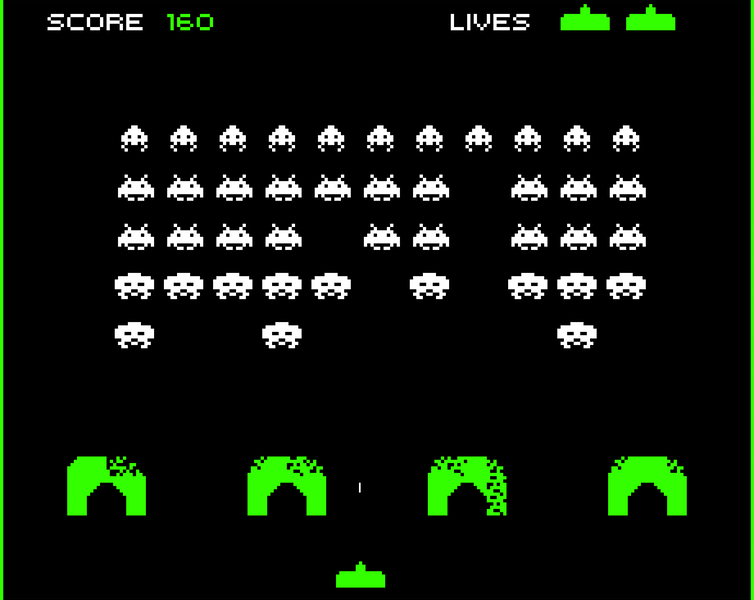
</div>

## Relevancia del paradigma

<table><tr>
    <td> <img src="A-schematic-diagram-of-actor-critic-reinforcement-learning-applied-to-a-two-joint-robotic.ppm.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="FHvAG5.jpg" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="screenshot.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

## Ejemplo - CartPole

Se importan las librerías de interés

In [1]:
import sys
sys.path.append('/home/andres/miniconda3/envs/rl_projects/lib/python3.6/site-packages')

import gym
import numpy as np
import random
import math

Se genera el ambiente para correr el ejemplo

In [2]:
environment = gym.make('CartPole-v0')

Se define el número de "buckets" y número de acciones

In [3]:
no_buckets = (1, 1, 6, 3)
no_actions = environment.action_space.n

Se definen los límites de estado

In [4]:
state_value_bounds = list(zip(environment.observation_space.low, environment.observation_space.high))
state_value_bounds[1] = [-0.5, 0.5]
state_value_bounds[3] = [-math.radians(50), math.radians(50)]

Se define el índice de acción

In [5]:
action_index = len(no_buckets)

Se define la tabla con los "Q-Values"

In [6]:
q_value_table = np.zeros(no_buckets + (no_actions,))

Se define la proporción mínima de exploración y la proporción mínima de aprendizaje

In [7]:
min_explore_rate = 0.01
min_learning_rate = 0.1

Se definen múltiples variables

In [8]:
max_episodes = 1000
max_time_steps = 250
streak_to_end = 120
solved_time = 199
discount = 0.99
no_streaks = 0

Sección de funciones

In [9]:
# Seleccionar qué acción llevar a cabo
def select_action(state_value, explore_rate):
    if random.random() < explore_rate:
        action = environment.action_space.sample()
    else:
        action = np.argmax(q_value_table[state_value])
    return action

# Seleccionar la proporción de exploración
def select_explore_rate(x):
    return max(min_explore_rate, min(1, 1.0 - math.log10((x+1)/25)))

# Seleccionar la proporción de aprendizaje
def select_learning_rate(x):
    return max(min_learning_rate, min(0.5, 1.0 - math.log10((x+1)/25)))

# Agrupar los valores de estado
def bucketize_state_value(state_value):
    bucket_indexes = []
    for i in range(len(state_value)):
        if state_value[i] <= state_value_bounds[i][0]:
            bucket_index = 0
        elif state_value[i] >= state_value_bounds[i][1]:
            bucket_index = no_buckets[i] - 1
        else:
            bound_width = state_value_bounds[i][1] - state_value_bounds[i][0]
            offset = (no_buckets[i]-1)*state_value_bounds[i][0]/bound_width
            scaling = (no_buckets[i]-1)/bound_width
            bucket_index = int(round(scaling*state_value[i] - offset))
        bucket_indexes.append(bucket_index)
    return tuple(bucket_indexes)

Entrenar los episodios

In [ ]:
for episode_no in range(max_episodes):
    explore_rate = select_explore_rate(episode_no)
    learning_rate = select_learning_rate(episode_no)

    observation = environment.reset()

    start_state_value = bucketize_state_value(observation)
    previous_state_value = start_state_value

    for time_step in range(max_time_steps):
        environment.render()
        selected_action = select_action(previous_state_value, explore_rate)
        observation, reward_gain, completed, _ = environment.step(selected_action)
        state_value = bucketize_state_value(observation)
        best_q_value = np.amax(q_value_table[state_value])
        q_value_table[previous_state_value + (selected_action,)] += learning_rate * (
                reward_gain + discount * (best_q_value) - q_value_table[previous_state_value + (selected_action,)])
        
        
        # Debugging
        #print('Episode number : %d' % episode_no)
        #print('Time step : %d' % time_step)
        #print('Selection action : %d' % selected_action)
        #print('Current state : %s' % str(state_value))
        #print('Reward obtained : %f' % reward_gain)
        #print('Best Q value : %f' % best_q_value)
        #print('Learning rate : %f' % learning_rate)
        #print('Explore rate : %f' % explore_rate)
        #print('Streak number : %d' % no_streaks)

        if completed:
            #print('Episode %d finished after %f time steps' % (episode_no, time_step))
            if time_step >= solved_time:
                no_streaks += 1
            else:
                no_streaks = 0
            break

        previous_state_value = state_value

    if no_streaks > streak_to_end:
        break

Conclusión

<div>
<img src="1*iWJWMeOQmI5kmPMGZ3tovA.jpeg" width="800"/>
</div>

Referencias bibliográficas

- Sutton, R. y Barto, A. (2018) _Reinforcement Learning_, Massachusetts, USA: The MIT Press
- Chapelle, O., Scholkopf, B., y Zien, A. (2006) _Semi-Supervised Learning_, Massachusetts, USA: The MIT Press
- Saito, S., Wenzhuo, Y., y Shanmugamani, R. (2018) _Python Reinforcement Learning Projects_, Birmingham, UK: Packt Publishing
- Dutta, S. (2018) _Reinforcement Learning with TensorFlow_, Birmingham, UK: Packt Publishing
- https://towardsdatascience.com/reinforcement-learning-brain-and-psychology-part-1-introduction-b5f79a0475ab
- https://www.smithsonianmag.com/science-nature/original-space-invaders-icon-1970s-America-180969393/
- https://towardsdatascience.com/the-future-with-reinforcement-learning-877a17187d54
- https://commons.wikimedia.org/wiki/File:Reinforcement_learning_diagram.svg
- https://medium.com/@.jlabs/reinforcement-learning-with-q-learning-1993f95e6b39